Customer Segmentation: Project

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [235]:
data=pd.read_csv('Mall_customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [236]:
data.shape

(200, 5)

In [237]:
data.drop(['CustomerID'], axis=1, inplace=True)

In [238]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [239]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [240]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [241]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Making a list of the columns which need to be factored into the analysis

In [242]:
factors=['Age', 'Annual Income (k$)','Spending Score (1-100)']

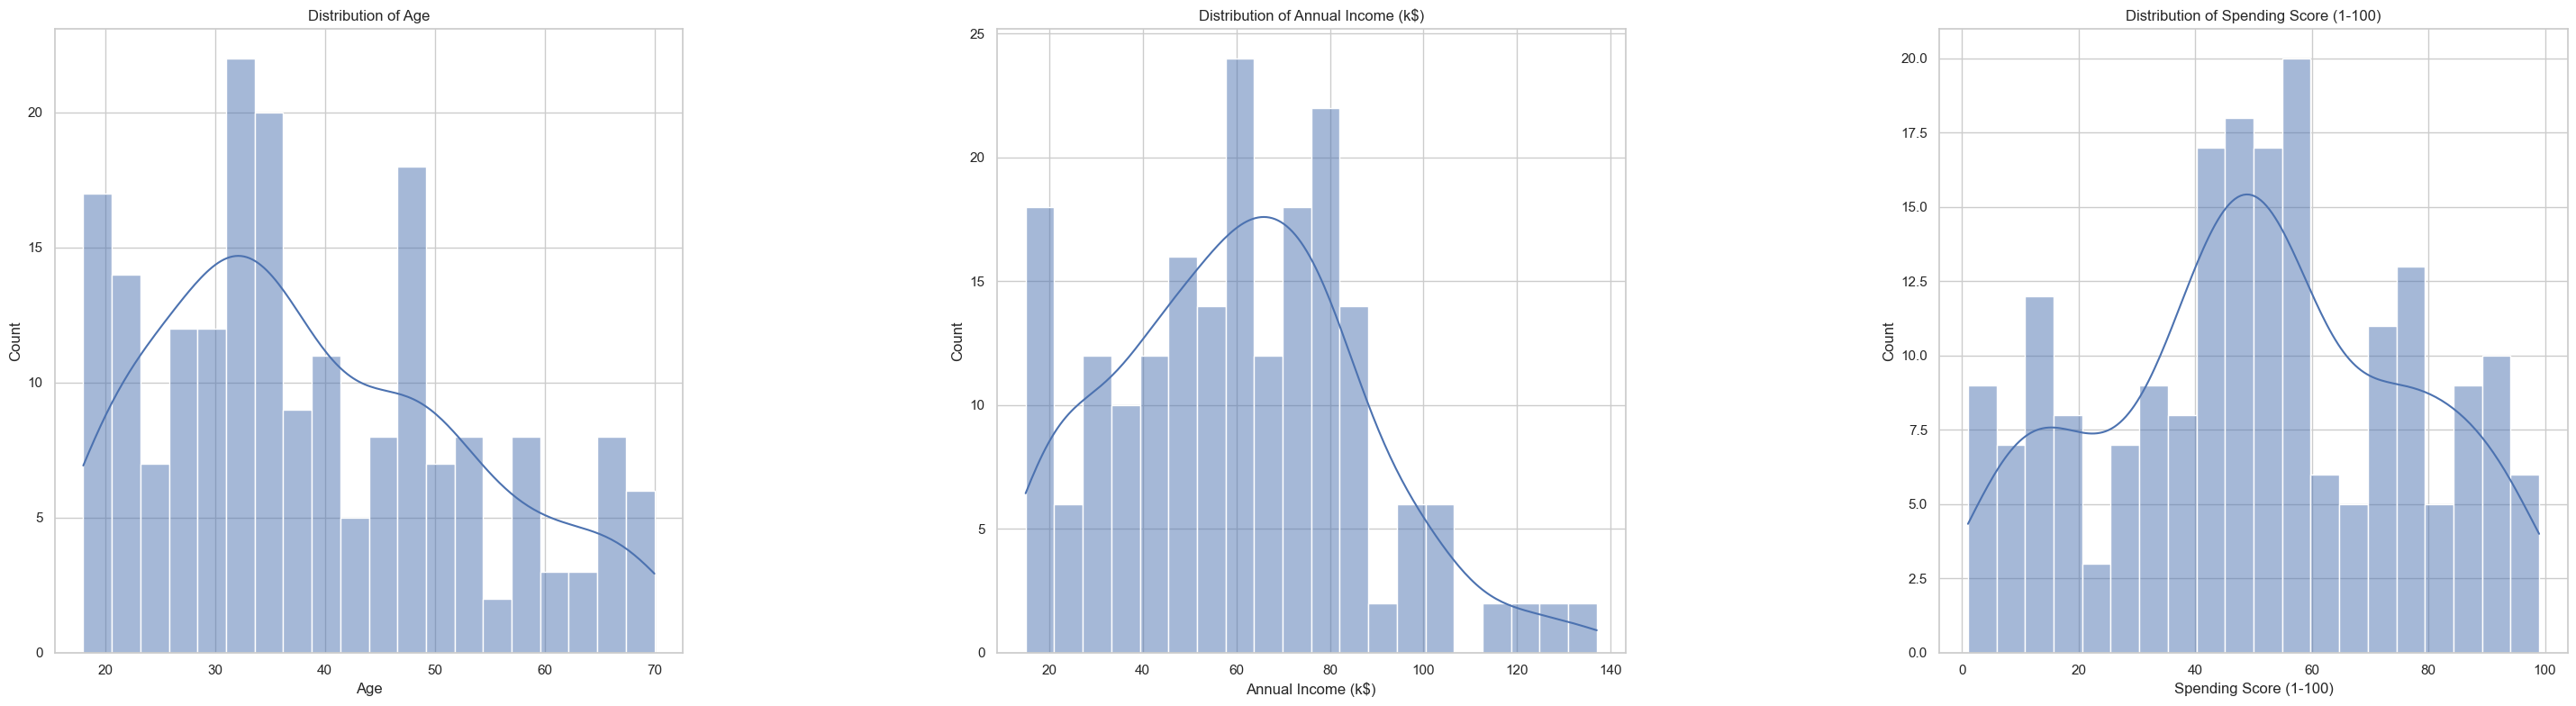

In [243]:
plt.figure(1, figsize=(36,9))
n=0
for x in factors:
    n+=1
    plt.subplot(1,len(factors),n)
    plt.subplots_adjust( wspace=0.5)
    sns.histplot(data[x], bins=20, kde=True)
    plt.title('Distribution of {}' .format(x))
plt.show()

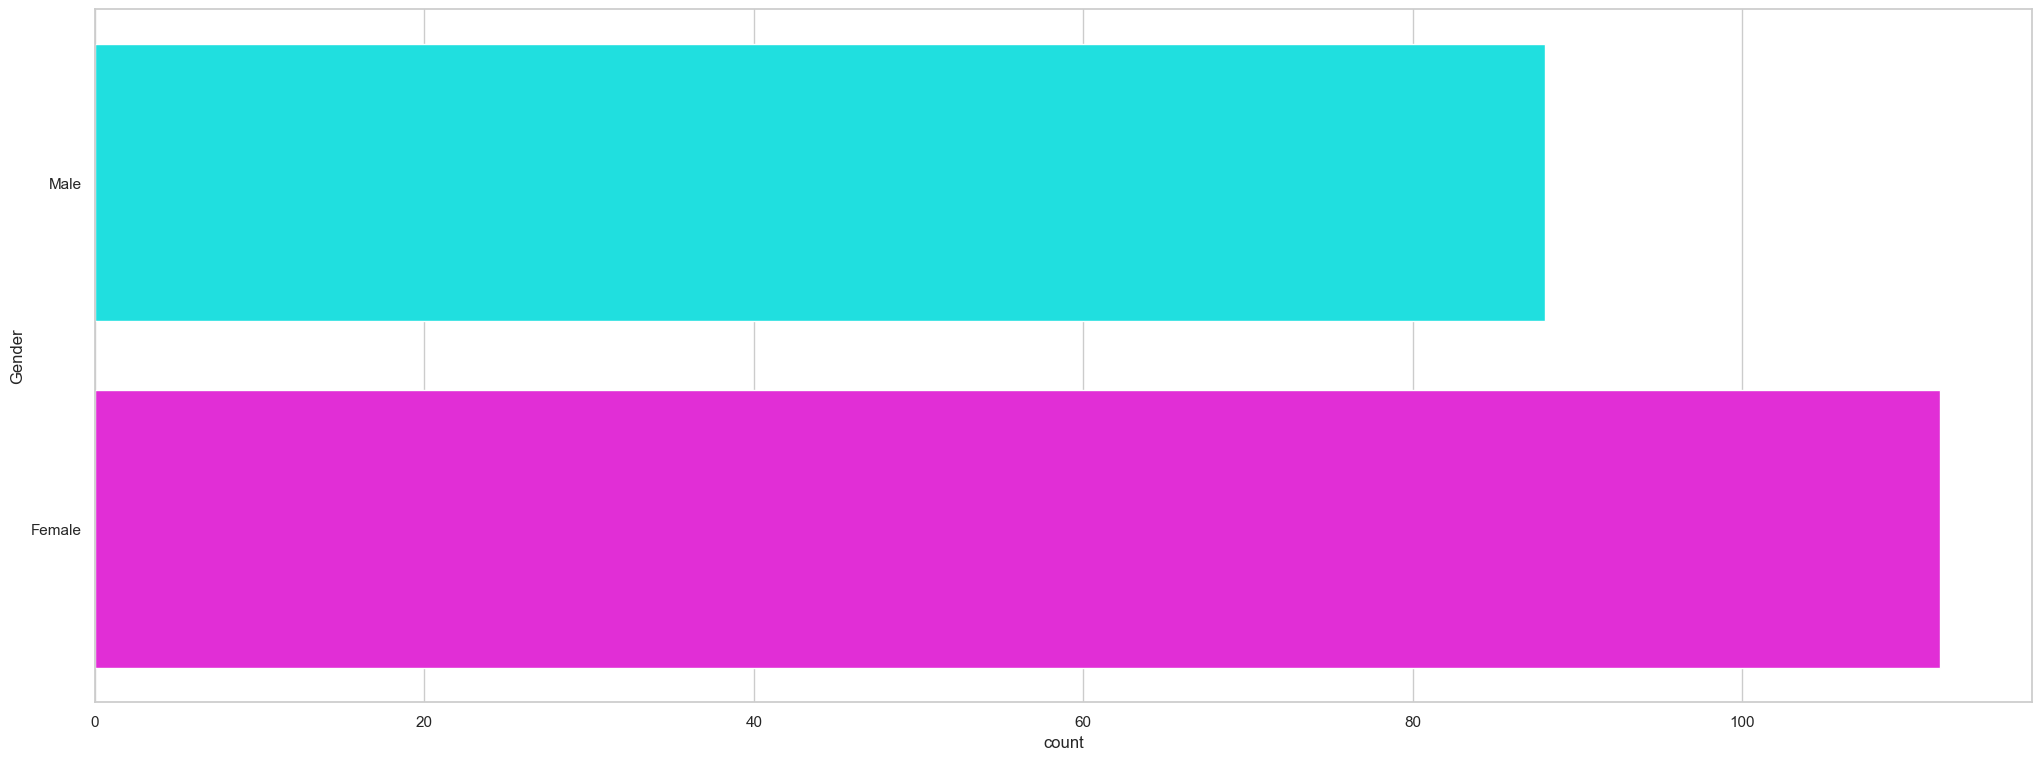

In [244]:
plt.figure(figsize=(25,9))
sns.countplot(y='Gender', data=data, palette=['#00FFFF', '#FF10F0'])
plt.show()

In [245]:
data['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

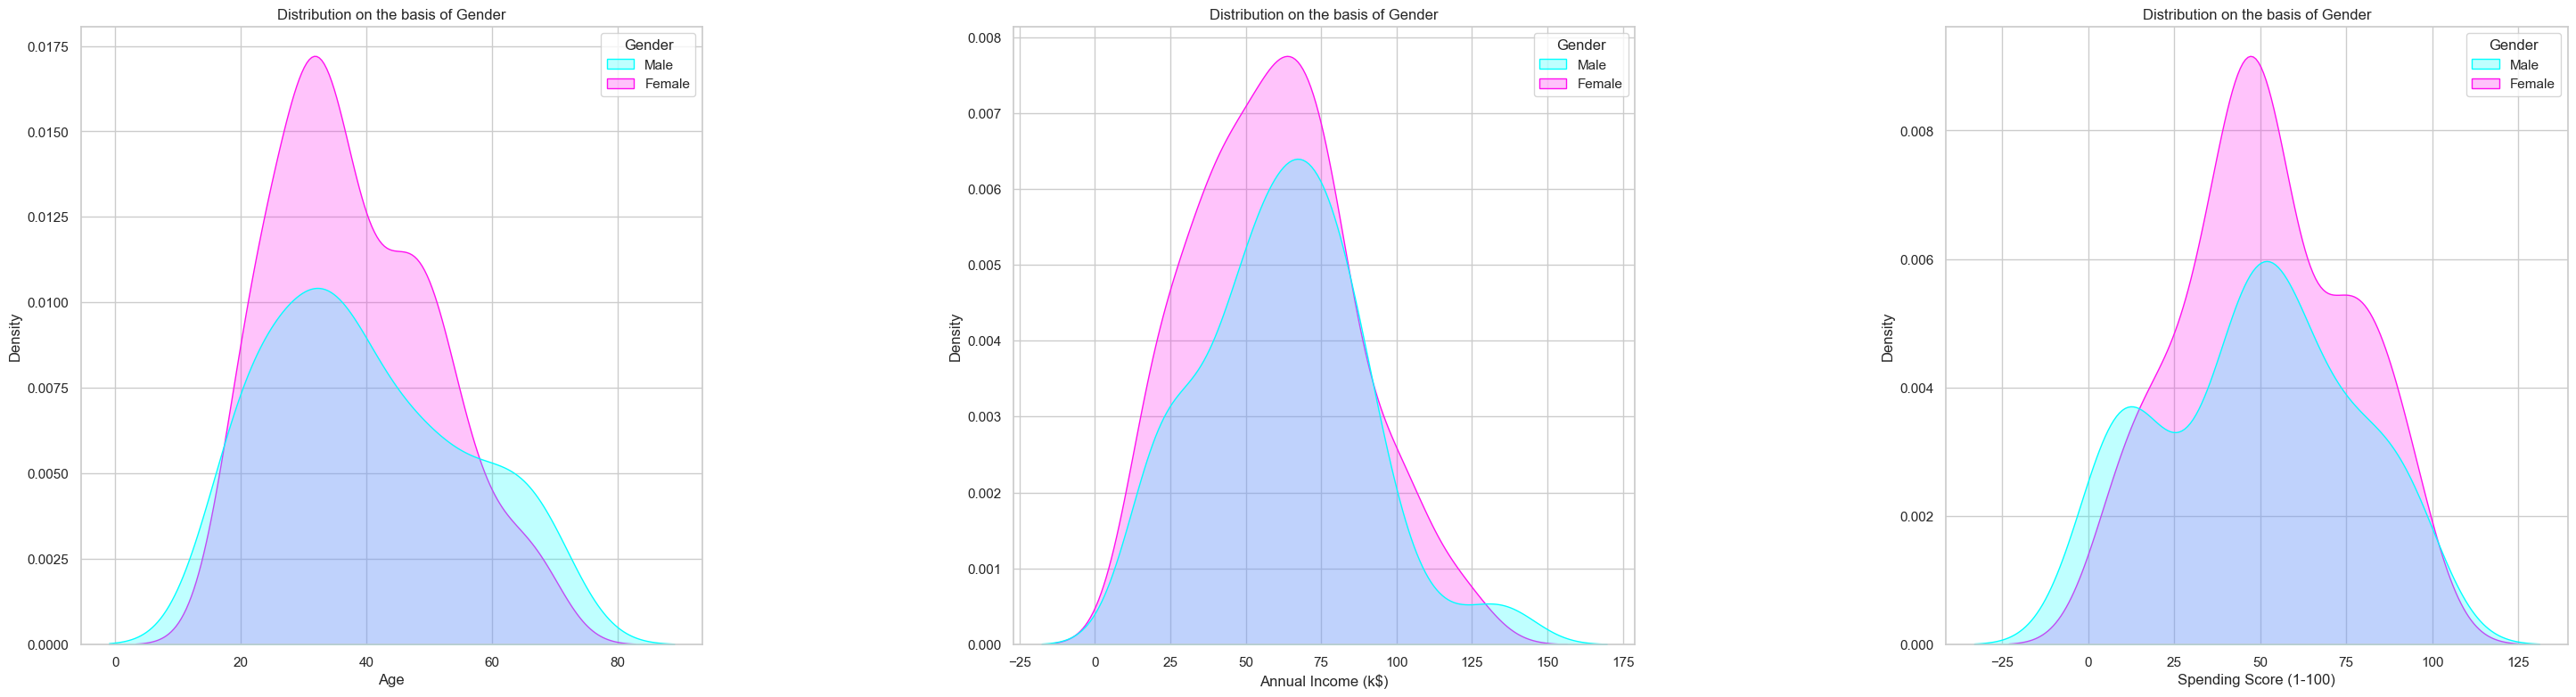

In [246]:
plt.figure(1, figsize=(36,9))
n=0
for cols in factors:
    n+=1
    plt.subplot(1,len(factors), n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(wspace=0.5)
    sns.kdeplot(x=data[cols], palette=['#00FFFF', '#FF10F0'], shade=True, hue=data['Gender'])
    plt.title('Distribution on the basis of Gender')
plt.show()

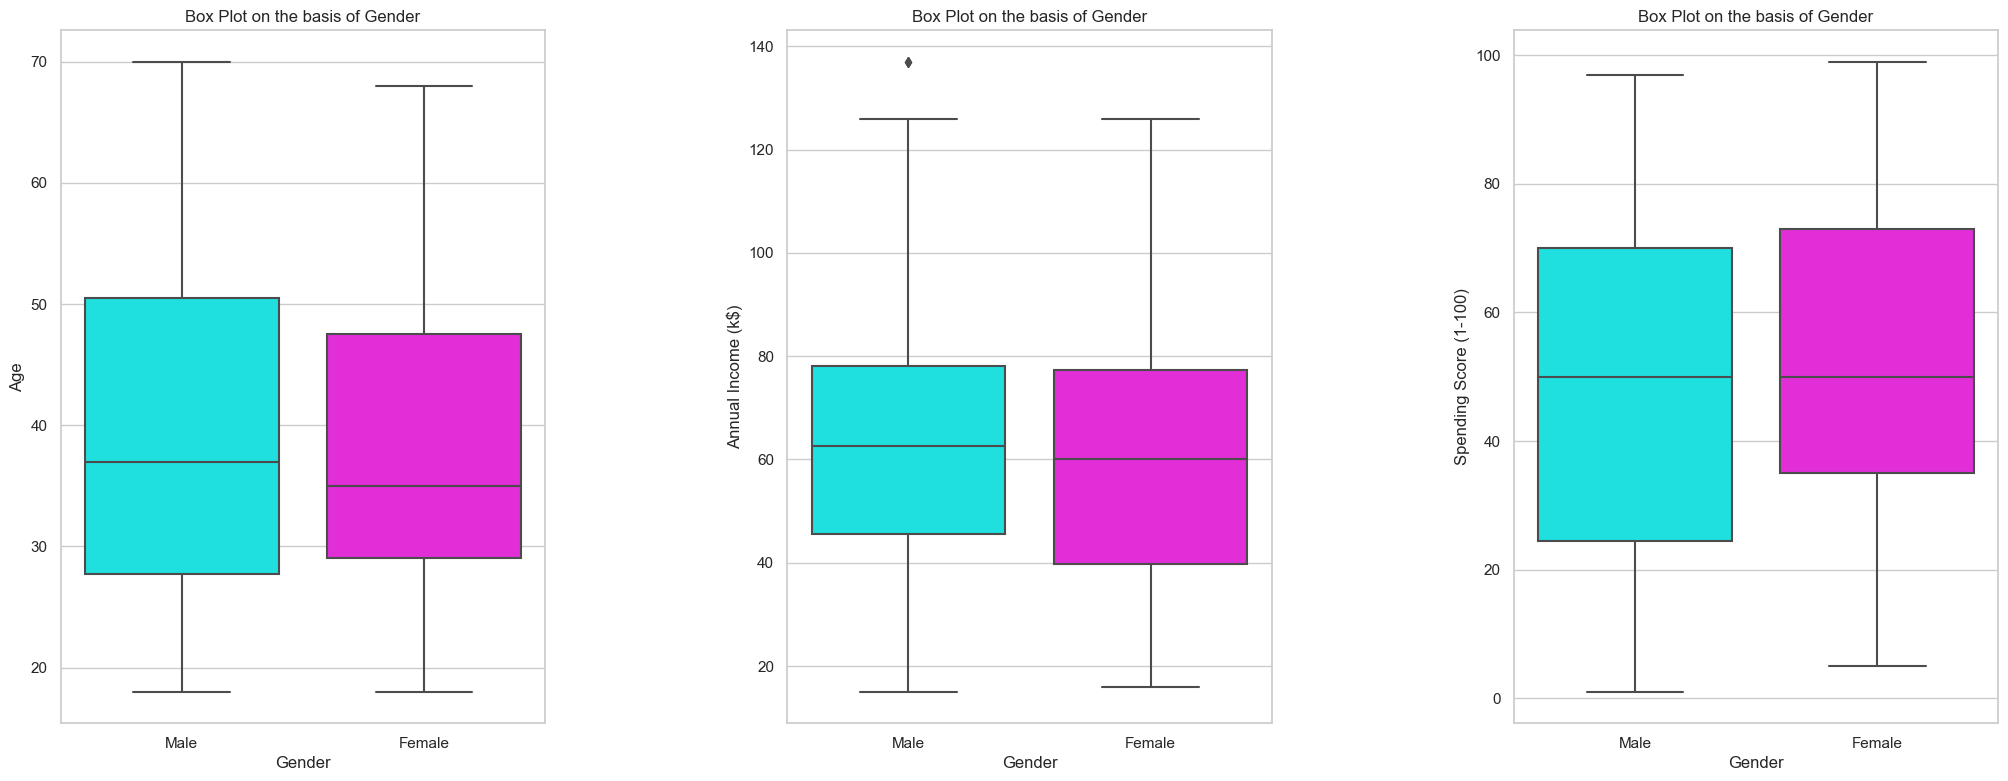

In [247]:
plt.figure(1, figsize=(25,9))
n=0
for cols in factors:
    n+=1
    plt.subplot(1,len(factors), n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(wspace=0.5)
    sns.boxplot(x='Gender', y=data[cols], data=data, palette=['#00FFFF', '#FF10F0'])
    plt.title('Box Plot on the basis of Gender')
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

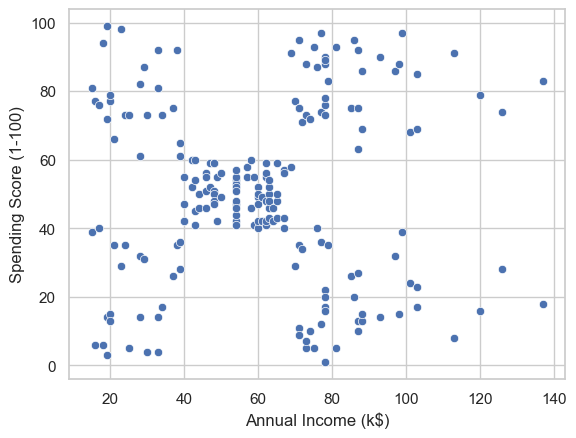

In [248]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)

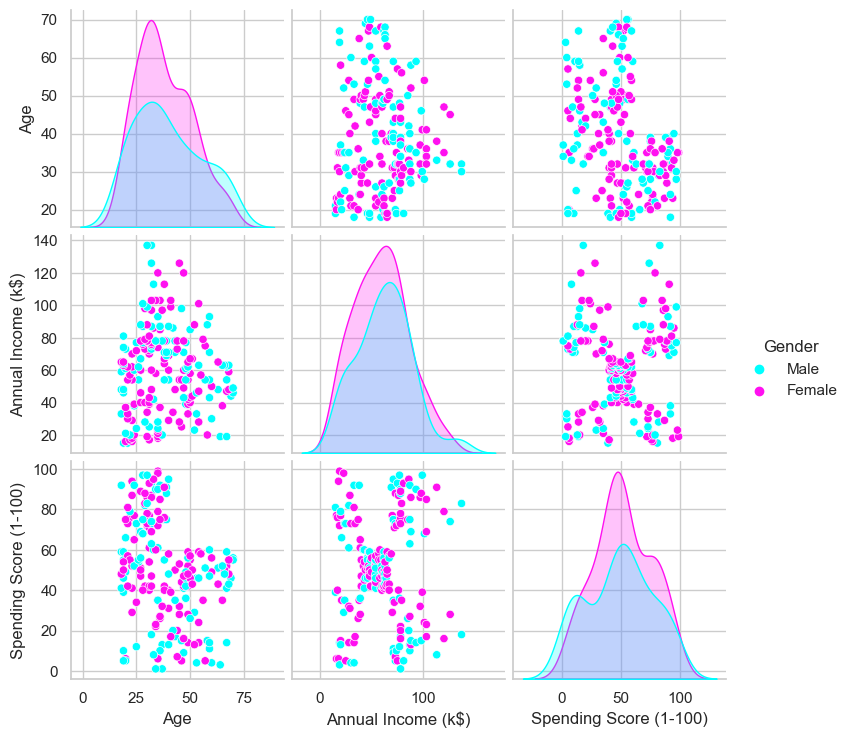

In [249]:
sns.pairplot(data, hue='Gender', palette=['#00FFFF', '#FF10F0'])

In [250]:
data.groupby(['Gender'])[factors].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

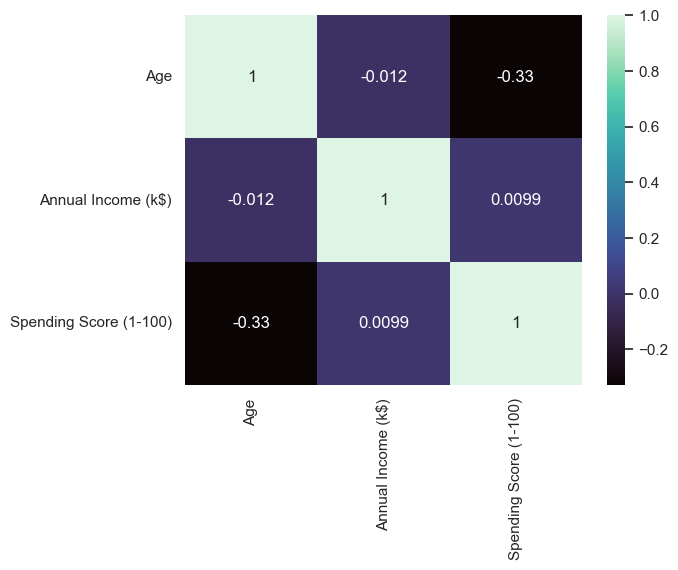

In [251]:
sns.heatmap(data.corr(), annot=True, cmap='mako')

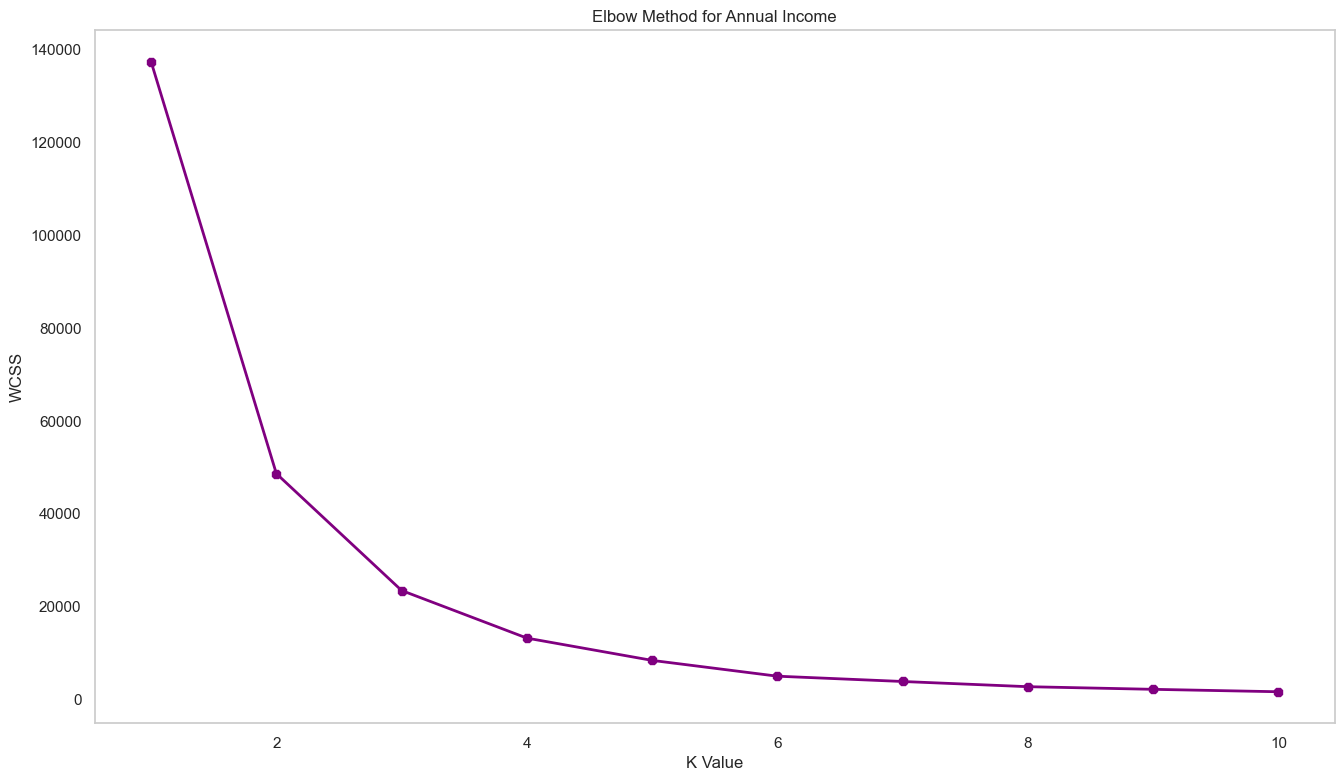

In [271]:
from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
    km=KMeans(n_clusters=k, init='k-means++')
    km.fit(data[['Annual Income (k$)']])
    wcss.append(km.inertia_)

plt.figure(figsize=(16,9))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='purple', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.title('Elbow Method for Annual Income')
plt.show()


In [253]:
income_clustering=KMeans(n_clusters=3)
income_clustering.fit(data[['Annual Income (k$)']])
income_clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [254]:
data['Income Cluster']=income_clustering.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [255]:
data['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [256]:
data.groupby('Income Cluster')[factors].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


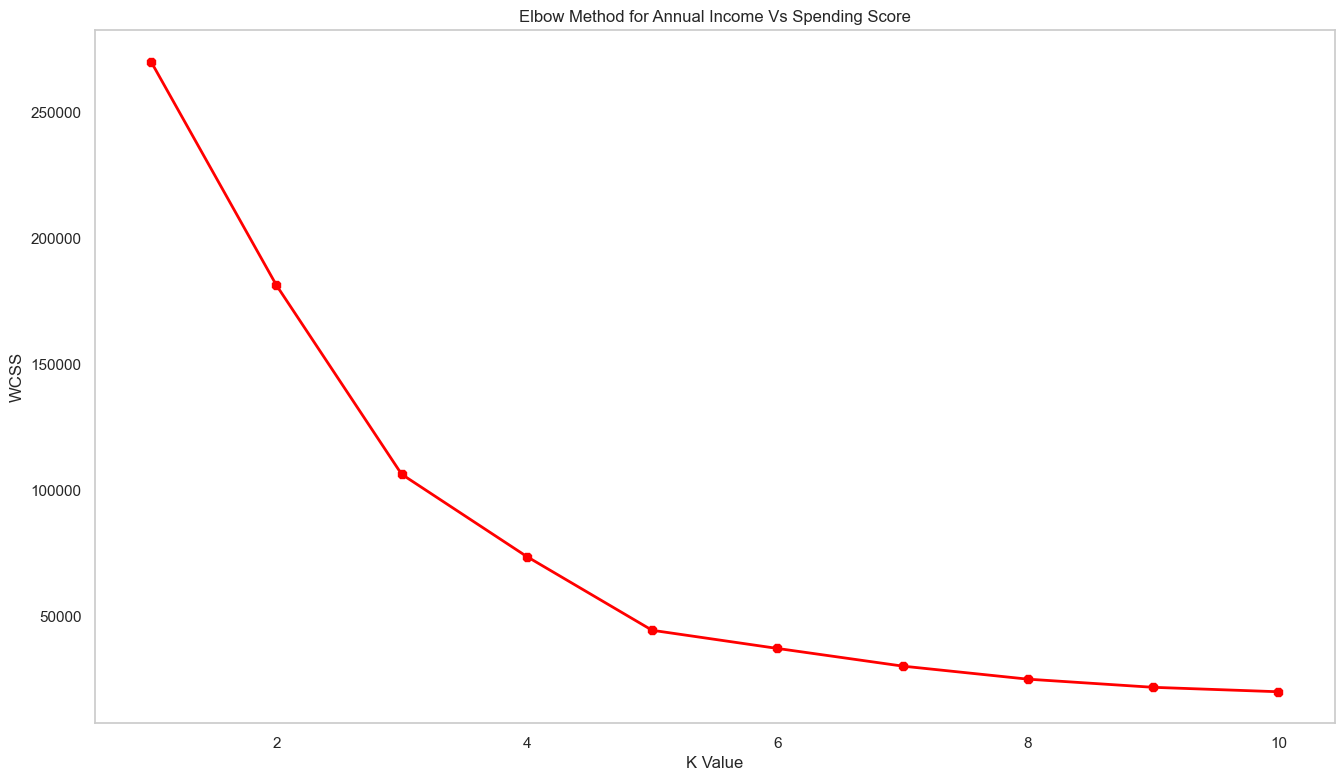

In [272]:

wcss2=[]

for k in range (1,11):
    km2=KMeans(n_clusters=k, init="k-means++")
    km2.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss2.append(km2.inertia_)

plt.figure(figsize=(16,9))
plt.grid()
plt.plot(range(1,11), wcss2, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.title('Elbow Method for Annual Income Vs Spending Score')
plt.show()

In [258]:
ai_ss_clustering=KMeans(n_clusters=5)
ai_ss_clustering.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
ai_ss_clustering.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [259]:
data['Spending and Income Cluster']=ai_ss_clustering.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,1
2,Female,20,16,6,0,4
3,Female,23,16,77,0,1
4,Female,31,17,40,0,4


In [260]:
centroids=pd.DataFrame(ai_ss_clustering.cluster_centers_)
centroids.columns=['x', 'y']

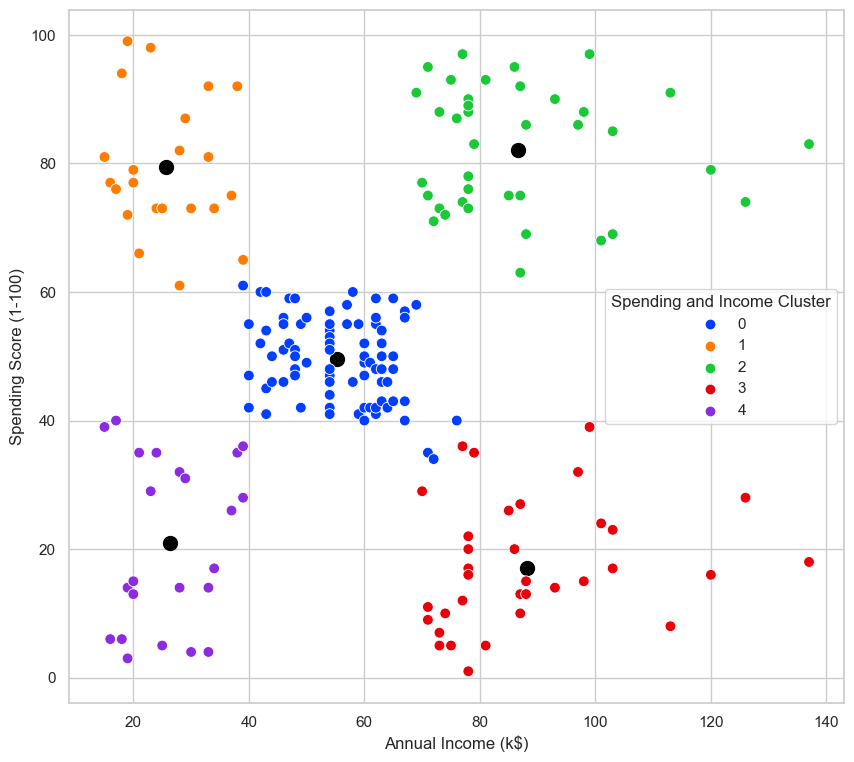

In [261]:
plt.figure(figsize=(10,9))
plt.scatter(x=centroids['x'], y=centroids['y'], s=100, c='black')
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='bright', s=60)
plt.show()

In [262]:
pd.crosstab(data['Spending and Income Cluster'], data['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,48,33
1,13,9
2,21,18
3,16,19
4,14,9


In [263]:
pd.crosstab(data['Spending and Income Cluster'], data['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [264]:
data.groupby('Spending and Income Cluster')[factors].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043
